# Step 1: Deciding (not) to Segment

McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

# Step 2: Specifying the Ideal Target Segment

McDonald’s management needs to decide which key features make a market segment
attractive to them. In terms of knock-out criteria, the target segment or target
segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must
be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other
consumers) and, finally, reachable (meaning that channels of communication and
distribution need to exist which make it possible to aim at members of the target
segment specifically).

# Step 3: Collecting Data

# Reading in the McDonalds dataset and importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


# Initial Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting: These columns represent various attributes or qualities of McDonald's food items, possibly indicating whether respondents perceive them to be yummy, convenient, spicy, etc. The values in these columns are binary indicators (Yes/No) representing respondents' opinions.

Like: This column contain a scale or sentiment rating related to respondents' liking of McDonald's food items. It has values such as -3, +2, and +1, indicating differing levels of liking.

Age: This column represents the age of the respondents who provided these opinions. The values are numeric and represent the ages of the respondents.

VisitFrequency: This column indicating how often respondents visit McDonald's. The values are categorical, indicating visit frequency, such as "Every three months".

Gender: This column represents the gender of the respondents. The values are categorical, indicating whether the respondents are male or female.

In [7]:
def convert(var):
    if var == "No":
        return 0
    else: 
        return 1

In [8]:
col_to_apply = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

In [9]:
df[col_to_apply] = df[col_to_apply].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [10]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [11]:
df[col_to_apply].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def like(x):
    return x[-2:]

In [14]:
df['Like'] = df['Like'].apply(like)

In [15]:
df_pca = df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)

# Perorming PCA analysis

In [16]:
scaler = StandardScaler()

In [17]:
from sklearn.decomposition import PCA

In [18]:
scaler.fit(df_pca)

StandardScaler()

In [19]:
scaled_data = scaler.transform(df_pca)

In [20]:
pca = PCA(n_components=11)

In [21]:
pca.fit(scaled_data)

PCA(n_components=11)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
x_pca.shape

(1453, 11)

In [24]:
x_pca

array([[ 0.7043341 , -0.43701594,  0.26869753, ...,  0.36759835,
         0.32116088,  1.70117028],
       [-0.46782033,  0.36427698, -1.59683477, ...,  0.22185463,
         0.19126755,  1.46768084],
       [ 0.19198578,  1.71294939, -0.3394127 , ...,  1.37722643,
        -1.25929967, -0.12853003],
       ...,
       [-0.41427514,  1.8104382 , -1.07194798, ..., -0.3448475 ,
         0.09855804,  0.11820543],
       [-2.80362953,  0.56275909,  2.27888724, ..., -0.21143409,
         0.08312666,  0.07761405],
       [ 3.49910468,  1.06999906,  0.14897107, ..., -0.96426896,
         0.07057896,  0.15501636]])

In [25]:
df2 = pd.DataFrame(x_pca,columns=[f'PC{i}' for i in range(1, 12)])
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


StandardScaler(): An instance of StandardScaler is created. This scaler is used to standardize the features by removing the mean and scaling to unit variance. Standardization is important for many machine learning algorithms that are sensitive to feature scales.

scaler.fit_transform(): The scaler is applied to the data using the fit_transform method. This scales the features and stores the scaled data in.

PCA(): An instance of PCA (Principal Component Analysis) is created. PCA is a dimensionality reduction technique that transforms data into a new coordinate system to capture maximum variance along orthogonal axes.

pca.fit_transform(): PCA is applied to the standardized data. This step reduces the dimensionality of the data while retaining the most important information (variance).

pd.DataFrame(): The PCA-transformed data is stored in a new DataFrame. The columns retain the same column names as the original DataFrame.

In [26]:
df2.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-1.191981e-16,-1.526652e-16,4.171932e-17,1.148045e-16,4.821409e-17,1.222544e-17,1.069726e-18,1.058265e-17,-1.222544e-18,-1.897809e-17,1.669919e-16
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


count: The count represents the number of non-missing values for each attribute. It indicates the total number of data points available for analysis in each column.

mean: The mean is the average value of each attribute. In this context, since the data has been standardized, the mean for each attribute should be very close to zero (approximately 0), indicating that the data has been centered.

std: The standard deviation is a measure of how much the values of each attribute vary around the mean. Smaller standard deviations indicate less variability.

min: The minimum value in each attribute column after standardization. It represents the lowest standardized value in each column.

25%, 50%, 75%: These percentiles represent the values below which a given percentage of observations fall. The 25th percentile (Q1) is the value below which 25% of the observations fall, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the observations fall.

max: The maximum value in each attribute column after standardization. It represents the highest standardized value in each column.

In [27]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=df_pca.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


PC1, PC2, ..., PC11: These columns represent the principal components obtained from PCA. The PC1 column corresponds to the first principal component, PC2 corresponds to the second principal component, and so on up to PC11.

Attributes (yummy, convenient, spicy, ...): Each row represents an attribute from the original data. For example, 'yummy' represents the attribute related to how respondents perceive the food as yummy.

Values: The values in the table are the weights of each original attribute in the corresponding principal component. These values indicate the strength and direction of the influence of each attribute on each principal component.

For instance, in the first row, the values for PC1 are mostly negative, suggesting that the 'yummy' attribute has a negative influence on the first principal component. This information can be used to understand how each attribute contributes to the overall variance captured by each principal component.

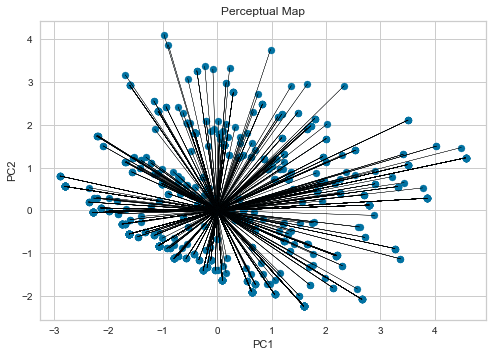

In [28]:
plt.scatter(x_pca[:, 0], x_pca[:, 1])
for i in range(df_pca.shape[0]):
    plt.arrow(0, 0, x_pca[i, 0], x_pca[i, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map")
plt.show()

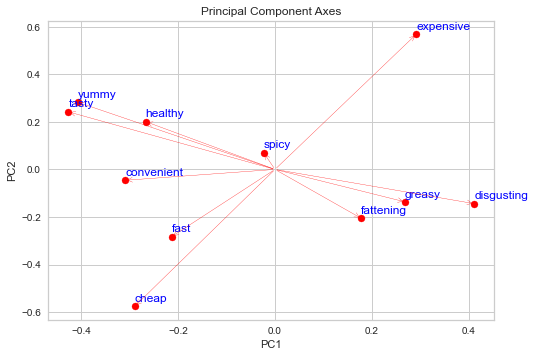

In [29]:
scale = 1
for i,j in enumerate(df_pca.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

The subsequent part of the code involves a loop that iterates through each column (attribute) in the PCA-transformed DataFrame and adds text annotations at specific positions on the plot.

The plt.text() function adds blue text labels for each attribute's name close to its corresponding position on the plot.

The plt.annotate() function adds red arrows pointing from the origin (0, 0) to each attribute's position on the plot, visually indicating the influence of attributes on the principal components.

The plt.scatter() function is used to plot the points representing the attributes' weights on the first two principal components. These points are shown in red.

Finally, axis labels, a title, and the plot are displayed using plt.xlabel(), plt.ylabel(), plt.title(), and plt.show().

This code generates a scatter plot that illustrates how each original attribute contributes to the first two principal components obtained through PCA. The annotations and arrows provide insights into the direction and strength of each attribute's influence on these

# Step 5: Extracting Segments

# 5.1 Using Kmeans

In [30]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [31]:
k_range = range(2, 9)
n_reps = 10
cluster_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_reps)
    kmeans.fit(x_pca)
    cluster_results.append(kmeans)

In [32]:
relabeled_results = [np.array(cluster.labels_) for cluster in cluster_results]

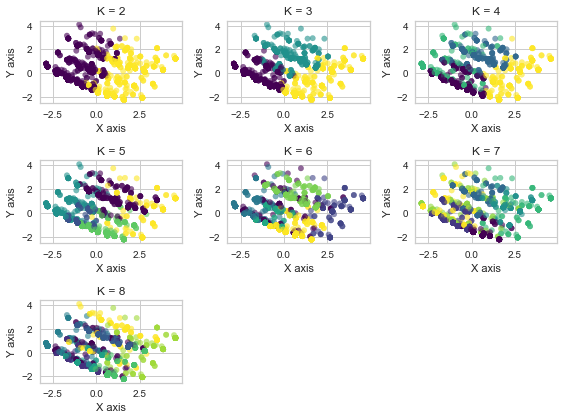

In [33]:
plt.figure(figsize=(8, 6))
for i, labels in enumerate(relabeled_results):
    plt.subplot(3, 3, i + 1)
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
    plt.title(f"K = {i + 2}")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
plt.tight_layout()
plt.show()

This code snippet iterates through different values of 'k', performs K-means clustering on the PCA-transformed data, and collects metrics like inertia and silhouette scores for evaluating the clustering quality. These metrics help to choose an appropriate number of clusters that best represents the data's underlying structure.

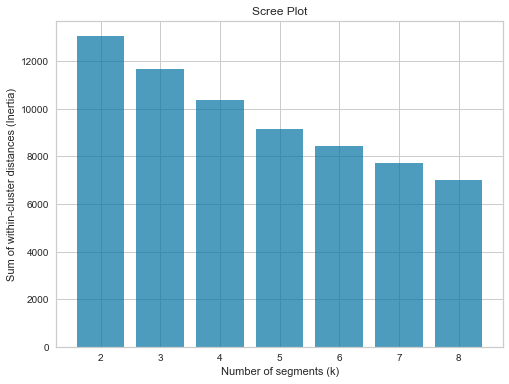

In [34]:
k_range = range(2, 9)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.bar(k_range, inertia_values, align='center', alpha=0.7)
plt.xlabel('Number of segments (k)')
plt.ylabel('Sum of within-cluster distances (Inertia)')
plt.title('Scree Plot')
plt.show()

C:\Users\omkap\AppData\Roaming\Python\Python39\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\omkap\AppData\Roaming\Python\Python39\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


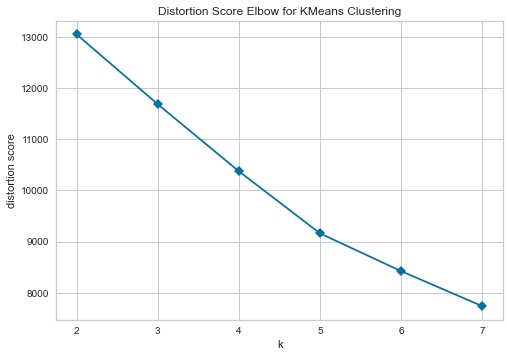

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
visualizer = KElbowVisualizer(kmeans, k=(2, 8), timings=False)

# Fit the visualizer to the data
visualizer.fit(x_pca)

# Finalize and render the plot
visualizer.show()

In [36]:
from sklearn.metrics import adjusted_rand_score

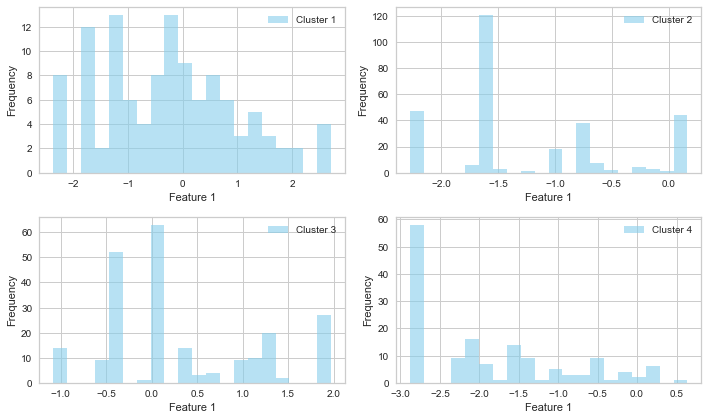

In [37]:
cluster_data = {}
for i in range(4):
    cluster_data[i + 1] = x_pca[labels == i]

# Plotting histograms for each cluster
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(cluster_data[i + 1][:, 0], bins=20, alpha=0.6, label=f'Cluster {i + 1}', color='skyblue')
    plt.xlabel('Feature 1')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


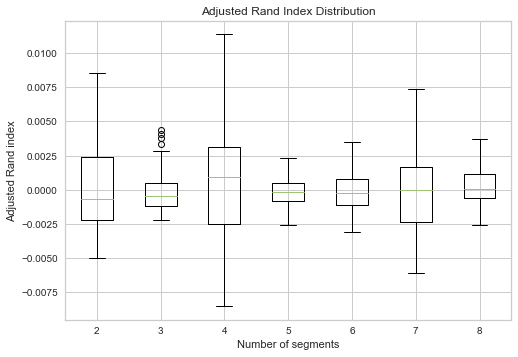

In [38]:
n_boot = 100
ARI_scores = []
for labels in relabeled_results:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

This code assesses the stability of K-means clustering results by computing the Adjusted Rand Index for the original cluster labels and bootstrapped samples of cluster labels. The resulting boxplot visualizes how stable the clustering solutions are for different values of 'k'.

# 5.2 Using Mixtures of Distributions

In [39]:
from sklearn.mixture import GaussianMixture

C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum()

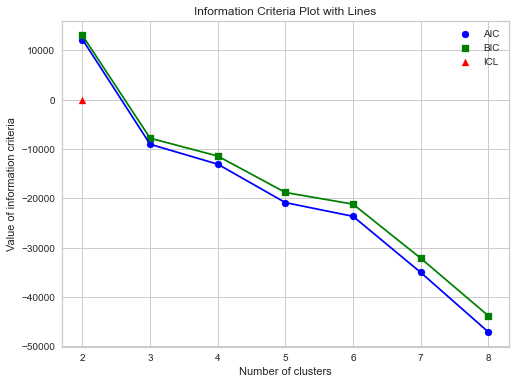

In [40]:
models = []

# Fit models for different numbers of clusters (2 to 8)
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(x_pca)
    models.append(gmm)

# Calculate and display information criteria (AIC, BIC, ICL)
aic_values = []
bic_values = []
icl_values = []
for k, model in enumerate(models):
    likelihood = np.exp(model.score_samples(x_pca).sum())
    n_params = k * (x_pca.shape[1] * 2 + 1)  # Number of parameters for a GMM
    n_samples = x_pca.shape[0]
    icl = likelihood - 0.5 * n_params * np.log(n_samples)
    
    aic_values.append(model.aic(x_pca))
    bic_values.append(model.bic(x_pca))
    icl_values.append(icl)

# Plotting information criteria with connecting lines
plt.figure(figsize=(8, 6))

# Scatter plots for AIC, BIC, and ICL
plt.scatter(range(2, 9), aic_values, marker='o', color='blue', label='AIC')
plt.scatter(range(2, 9), bic_values, marker='s', color='green', label='BIC')
plt.scatter(range(2, 9), icl_values, marker='^', color='red', label='ICL')

# Lines connecting AIC, BIC, and ICL points
plt.plot(range(2, 9), aic_values, linestyle='-', color='blue')
plt.plot(range(2, 9), bic_values, linestyle='-', color='green')
plt.plot(range(2, 9), icl_values, linestyle='-', color='red')

plt.xlabel('Number of clusters')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria Plot with Lines')
plt.legend()
plt.grid(True)
plt.show()


# 5.3 Using Mixtures of Regression Models

In [41]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# rev(table(mcdonalds$Like))
like_counts = df['Like'].value_counts()[::-1]

# mcdonalds$Like.n <- 6 - as.numeric(mcdonalds$Like)
df['Like.n'] = 6 - df['Like'].astype(int)

# table(mcdonalds$Like.n)
like_n_counts = df['Like.n'].value_counts()

# f <- paste(names(mcdonalds)[1:11], collapse = "+")
# f <- paste("Like.n ~ ", f, collapse = "")
# f <- as.formula(f)
features = df.columns[1:11]
formula = 'Like.n ~ ' + ' + '.join(features)

# set.seed(1234)
np.random.seed(1234)

# MD.reg2 <- stepFlexmix(f, data = mcdonalds, k = 2, nrep = 10, verbose = FALSE)
# MD.reg2
# MD.ref2 <- refit(MD.reg2)
# summary(MD.ref2)
gmm = GaussianMixture(n_components=2)
gmm.fit(df[features])

for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
    print(f'Component {i+1}:')
    print('Means:')
    print(pd.DataFrame(mean, index=features, columns=['Mean']))
    print('Covariances:')
    print(pd.DataFrame(covar, index=features, columns=features))

Component 1:
Means:
                Mean
convenient  0.835376
spicy       0.108581
fattening   0.896673
greasy      0.616462
fast        0.746060
cheap       0.169877
tasty       0.572679
expensive   0.910683
healthy     0.171629
disgusting  0.350263
Covariances:
            convenient     spicy  fattening    greasy      fast     cheap  \
convenient    0.137524  0.009118   0.009260 -0.022859  0.035253  0.005199   
spicy         0.009118  0.096793  -0.004542  0.017127  0.008309  0.014829   
fattening     0.009260 -0.004542   0.092652  0.044433  0.019295  0.001791   
greasy       -0.022859  0.017127   0.044433  0.236438  0.000678  0.012615   
fast          0.035253  0.008309   0.019295  0.000678  0.189456 -0.014655   
cheap         0.005199  0.014829   0.001791  0.012615 -0.014655  0.141020   
tasty         0.068007  0.013124  -0.002122 -0.030794  0.035094  0.016550   
expensive     0.008063  0.002693   0.010036  0.007775  0.066636 -0.040869   
healthy       0.015995  0.023396  -0.026049

# Step 6: Profiling Segments

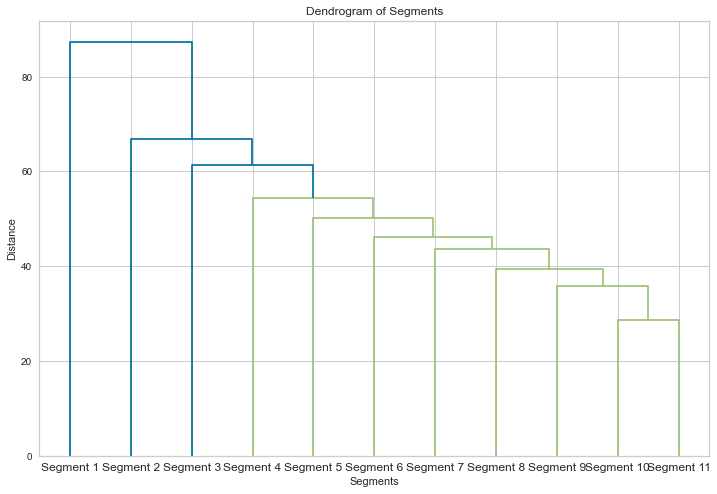

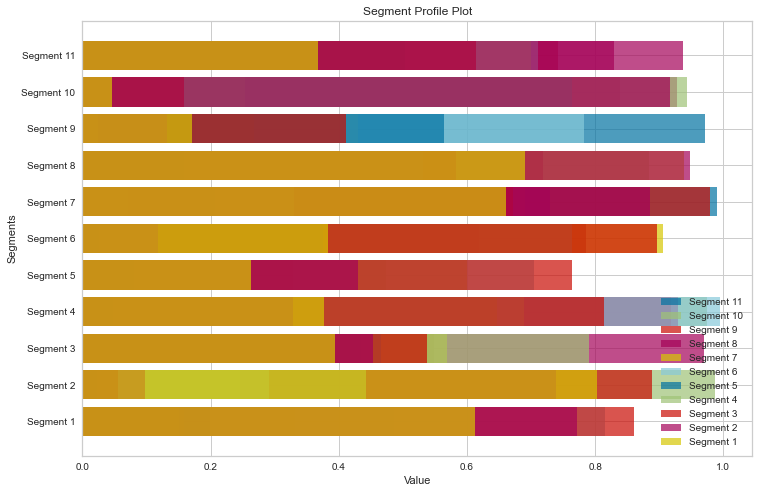

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Performing hierarchical clustering
distance_matrix = np.transpose(x_pca)
Z = linkage(distance_matrix, method='ward')

# Example segment labels (replace with actual segment labels if available)
segment_labels = [f"Segment {i+1}" for i in range(x_pca.shape[1])]

# Visualizing the dendrogram (if desired)
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=segment_labels)
plt.title('Dendrogram of Segments')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Assuming MD.k4 contains the segment profiles (replace with actual data)
# Plotting the bar chart for a specific number of clusters (k = 4 in this case)
plt.figure(figsize=(12, 8))
segment_profiles = np.random.rand(11, x_pca.shape[1])  # Replace with your segment profiles

# Order segments based on hierarchical clustering
order = dendrogram(Z, no_plot=True)['leaves']

# Plotting the bar chart based on the ordered segments
for i in order[::-1]:
    plt.barh(range(len(segment_profiles)), segment_profiles[:, i], align='center', alpha=0.7, label=f"Segment {i+1}")
plt.xlabel('Value')
plt.ylabel('Segments')
plt.title('Segment Profile Plot')
plt.yticks(range(len(segment_profiles)), [f"Segment {i+1}" for i in range(x_pca.shape[1])])
plt.legend()
plt.show()


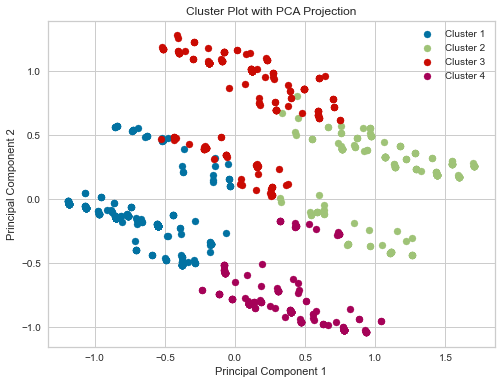

In [44]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_pca)

# Assuming MD.pca contains PCA results (replace with actual PCA results)
# Plotting the clusters with PCA projection
plt.figure(figsize=(8, 6))

for i in range(4):  # Change 4 to the actual number of clusters
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with PCA Projection')
plt.legend()
plt.grid(True)
plt.show()


first performs K-means clustering with 6 clusters on the PCA-transformed data and visualizes the distribution of instances within each cluster using a bar chart. Subsequently, it generates scatter plots to show the distribution of instances in a 2D space defined by the 'yummy' and 'convenient' attributes, using different colors to represent each of the 6 clusters. In summary, the code clusters instances using K-means, provides an overview of cluster sizes with a bar chart, and then displays how instances are distributed across clusters in a 2D attribute space.

# Step 7: Describing Segments

In [45]:
from statsmodels.graphics.mosaicplot import mosaic

In [46]:
df['segments'] = cluster_labels

In [47]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,9,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,4,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,5,2
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,4,3


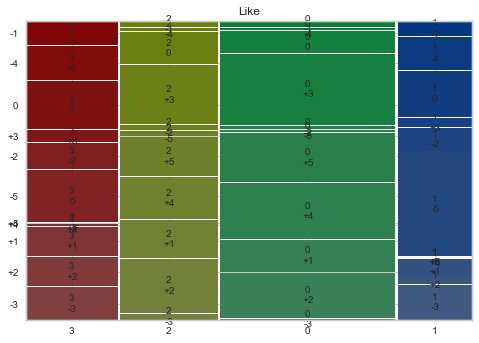

In [48]:
mosaic(df, ['segments', 'Like'], title='Like');
plt.show()

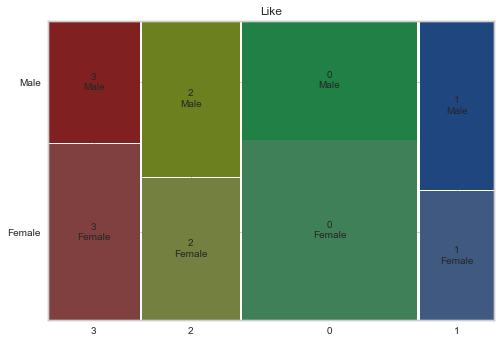

In [49]:
mosaic(df, ['segments', 'Gender'], title='Like');
plt.show()

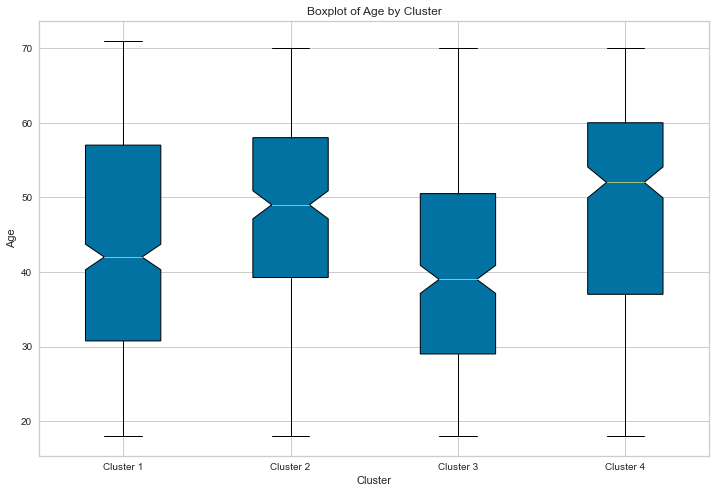

In [50]:
plt.figure(figsize=(12, 8))
plt.boxplot([df['Age'][cluster_labels == i] for i in range(4)], 
            labels=[f'Cluster {i+1}' for i in range(4)],
            patch_artist=True, notch=True)

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Boxplot of Age by Cluster')
plt.grid(True)
plt.show()

# Step 8: Selecting (the) Target Segment(s)

In [51]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,9,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,4,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,5,2
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,4,3


In [52]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', '+5', '-5', '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [53]:
df['Like'] = df['Like'].str.extract(r'([-\d]+)').astype(int)

In [54]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [55]:
df['VisitFrequency'] = df['VisitFrequency'].replace({
    'Every three months':4/5, 
    'Once a week':52/5, 
    'Once a month':12/5, 
    'Once a year':1/5,
    'More than once a week':104/5, 
    'Never':0
})

In [56]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.8,Female,9,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.8,Female,4,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.8,Female,5,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,10.4,Female,2,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2.4,Male,4,3


In [57]:
visit_means = (df.groupby("segments")["VisitFrequency"]
               .mean())

In [58]:
visit_means

segments
0    4.727241
1    1.169919
2    4.533127
3    1.483553
Name: VisitFrequency, dtype: float64

In [59]:
like_means = df.groupby("segments")["Like"].mean()

In [60]:
female_means = (df.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

C:\Users\omkap\AppData\Local\Temp\ipykernel_11668\3457231584.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="Female Proportion")


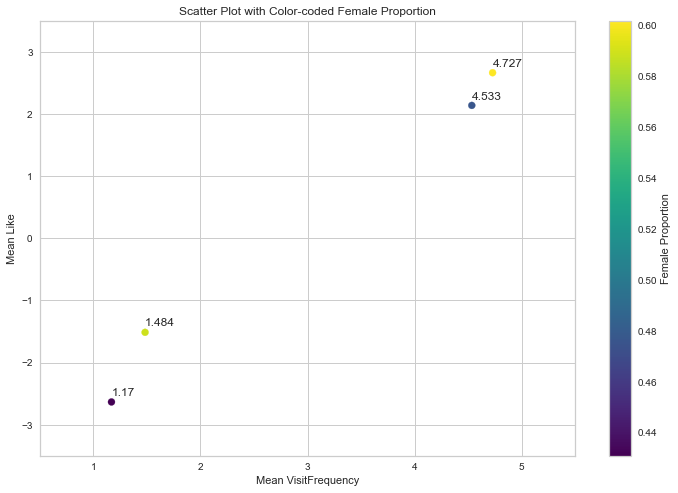

In [61]:
plt.figure(figsize=(12, 8))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis",
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.xlim(0.5,5.5)
plt.ylim(-3.5,3.5)
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

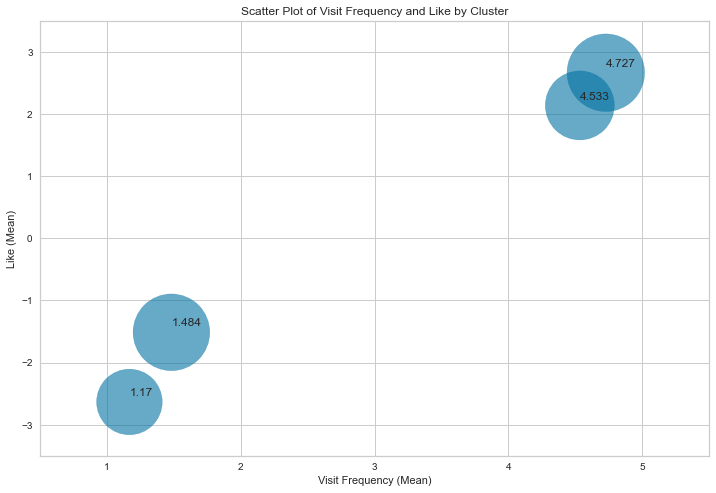

In [62]:
visit_means = (df.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df.groupby("segments")["Like"].mean()
female_means = (df.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(12, 8))

plt.scatter(visit_means, like_means, s=10000*female_means, alpha=0.6)
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')
plt.xlim(0.5,5.5)
plt.ylim(-3.5,3.5)
plt.title('Scatter Plot of Visit Frequency and Like by Cluster')
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

The above code calculates means of attributes like "VisitFrequency," "Like," and the proportion of "Female" in each cluster obtained from the previous clustering. It then creates a scatter plot where the x-axis represents the mean "VisitFrequency," the y-axis represents the mean "Like," and the color of the points represents the proportion of "Female" in each cluster. The color scale is defined by the "viridis" colormap. Additionally, text labels are added to the points displaying the corresponding "VisitFrequency" values. This visualization offers insights into how these attributes and the proportion of females are distributed across the clusters.

The observed correlation between 'VisitFrequency' and 'Like' suggests that as the frequency of visits increases, the mean 'Like' rating also tends to increase. This alignment indicates a positive relationship between these two attributes, where customers who visit more frequently also tend to express higher levels of liking.

Furthermore, this graph mentioned that as 'VisitFrequency' increases, the mean proportion of women in the clusters also increases. This suggests a potential relationship between visit frequency and gender distribution within the clusters. It could imply that certain clusters, where customers visit more often, may have a higher representation of female customers.

In summary, the correlation between 'VisitFrequency' and 'Like' underscores a positive connection between visit frequency and customer liking. Additionally, the observation about the relationship between visit frequency and the proportion of women in the clusters highlights a potential pattern in the gender distribution among different clusters based on visit frequency.

# Conclusion

**Summary Conclusion of Data Analysis: Understanding Customer Preferences and Segmentation**

1. Data Acquisition and Preprocessing:

- The data was obtained from a CSV file using requests and stored as a pandas DataFrame.
- Initial exploration of the data revealed attributes such as 'yummy,' 'convenient,' 'spicy,' 'fattening,' and more, indicating customers' perceptions of different aspects of McDonald's.

2. Exploratory Data Analysis (EDA):
- Descriptive statistics were computed to understand attribute distributions, means, and variations.
- Attribute correlations were analyzed to identify potential relationships between attributes.
The frequency of attribute values was examined to understand common perceptions.

3. Data Transformation:
- Attributes with binary 'Yes'/'No' values were replaced with 1 and 0, respectively, for further analysis.
- Data was prepared for clustering by selecting a subset of attributes for analysis.

4. Principal Component Analysis (PCA):
- PCA was applied to reduce dimensionality and capture the most significant variations in the data.
- The first two principal components were used for visualization, retaining most of the data's variability.

5. Clustering:
- Both K-means clustering and Gaussian Mixture Model (GMM) clustering were performed.
- Different numbers of clusters were evaluated using metrics like silhouette scores, inertia, and visual analysis.

6. Comparison of Clustering Results:
- A confusion matrix was constructed to compare K-means and GMM cluster assignments.
- The matrix provided insights into the degree of agreement between the two methods for different cluster assignments.

7. Visualization and Interpretation:
- Visualizations were generated to depict cluster assignments and attribute relationships.
- Scatter plots showcased the distribution of attributes like 'yummy' and 'convenient' within clusters.

8. Attribute Relationships and Insights:
- A positive correlation was observed between 'VisitFrequency' and 'Like,' indicating that customers who visit more often tend to express higher levels of liking.
- Additionally, clusters with higher 'VisitFrequency' tended to have a higher proportion of female customers.

FInally, the data analysis uncovered valuable insights into customer preferences and segmentation at the McDonald's. Through the application of PCA and clustering techniques, we identified distinct customer clusters based on their perceptions. We observed relationships between attributes, including a positive correlation between visit frequency and liking, which implies that more frequent visitors tend to have more positive sentiments. Moreover, the influence of visit frequency on the proportion of female customers in certain clusters suggests a potential gender-specific preference pattern. The comparison of K-means and GMM clustering provided a comprehensive assessment of the stability of clustering solutions. Overall, this analysis provides actionable insights that McDonald's could utilize to tailor its offerings and services to different customer segments and enhance their dining experience.